# **Project Name   - TED Talk Views Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Contributor       - Ayush Tickoo**


# **Project Summary -**

In this project, the objective is to predict the number of views a TED talk session can have using the dataset provided, by applying specific methods to draw out heuristics after doing exploratory data analysis on the dataset. Before beginning with the data analysis, data wrangling will be done to get the data in a format ready for analysis. Hence after completing the wrangling and analysis statistically and visually, we will continue doing transformations on the dataset, if required. Transformations, such as encoding, normalization, and regularization of the dataset. After the data is ready is ready to be entered in to a model, it will be split into a proportion and a portion of it will be kept for testing the model chosen. Hence, multiple models will be applied to get acknowleged about the model that fits the dataset best for predictions, which will also be followed by paramter tuning, if required to get the highest accuracy possible.

# **GitHub Link -**

https://github.com/007tickooayush/ML-Regression-TED-talks-Project

# **Problem Statement**


TED is all about spreading powerful ideas on any topic. This dataset contains over 4,005 TED talks, including transcripts in multiple languages.

Founded in 1984 by Richard Salman, the nonprofit organization dedicated to bringing together experts in the fields of technology, entertainment, and design, TED talks have become a mecca for ideas from nearly every industry. In 2015, TED and its sister TEDx chapters published over 2,000 talks that are freely available to the general public, with a list of speakers including Al Gore, Jimmy Wales, Shah Rukh Khan and Bill Gates.

TED Talks has been using “ideas worth spreading” as a platform for years.
In the digital world we live in today, TED is a great platform to spread your ideas. But how do you know if your ideas will be heard or appreciated.

The main goal is to build a predictive model that can help predict the number of views of videos uploaded to the TEDx website.

In [ ]:
import time 
start_time = time.time()

## **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## **About the dataset**

### Import Libraries

In [ ]:
# Import Libraries
from numpy import math
import numpy as np
from numpy import nan
import pandas as pd
import missingno as msno

from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,log_loss
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import f_regression
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# to reduce the deprecated method and other unnecessary warning messages from the console
import warnings
warnings.filterwarnings('ignore')

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = False)

### Dataset Loading

In [ ]:
# Load Dataset
dir_path = '/content/drive/MyDrive/Colab Notebooks/ALMABETTER_DSC/1_1.2_Regression_Project/Ayush Tickoo ML Regression Project [Capstone Project]/data/'
df = pd.read_csv(dir_path+'data_ted_talks.csv')

In [ ]:
# create a backup of the datafame
df_bkup = df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns overview
df.info()

In [ ]:
# Description of non-numerical variables in dataset 
df.describe(include='object')

In [ ]:
# Descrption of numerical columns 
df.describe()

In [ ]:
# Dimensions of Dataset
df.shape

In [ ]:
# First entry of dataset
df.iloc[0]

In [ ]:
# Last entry of dataset
df.iloc[-1]

### Dataset Information

In [ ]:
# Columns of the dataset
df.columns

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Count of Duplicates in dataset: ',(df.duplicated()).sum())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values in form of heatmap
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [ ]:
# Printing the matrix of missing/NaN values of columns
msno.matrix(df)
plt.show()

## **Understanding the Variables**

### Variables Description 


- **talk_id** - identification number provided by TED (int)
- **title** - Title of TED talk (string) 
- **speaker_1** - First speaker in TED speaker list (string)
- **all_speakers** - All the speakers in the TED session (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_name'}`<br>`(speaker - speaker number of session, speaker_name - name of speaker)]`
- **occupations** - Occupation of the speakers of the session (dictionary) <br> `[FORMAT - {'speaker' : 'speaker_occupation'}`<br>`(speaker - speaker number of session, speaker_occupation - occupation of speaker)]`
- **about_speakers** - Descriptive text about speakers (dictionary) <br>`[FORMAT - {'speaker' : 'speaker_description'}`<br>`(speaker - speaker number of session, speaker_description - About the speaker)]`
- **views**{<u>**Dependent Variable**</u>} - Number of views (int) 
- **recorded_date** - Date of the TED session (string)
- **published_date** - Date of TED session publishment (string) 
- **event** - Event of the TED session (string)
- **native_lang** - Native language (string)
- **available_lang** - All the available languages (list)
- **comments** - Number of comments received (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **duration** - Duration of TED talk session (in seconds) (int)
- **topics** - Topic of the TED session and tags (list)
- **related_talks** - Related TED talk sessions (dictionary)<br>`[FORMAT - {'talk_id' : 'title'}`<br>`(talk_id - column 1 of dataset, title - column 2 of dataset)]`
- **url** - URL link of the TED session (string)
- **description** - Information about the TED talk session (string) 
- **transcript** - Complete transcript of the TED session (string)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_vals = pd.DataFrame(df.nunique(),columns=['unique_count'])
unique_vals['total'] = len(df)

unique_vals

## ***Data Cleaning and Data pre-processing***

### Data Cleaning Code

`Making the dataset analysis ready.`

In [ ]:
# Numerical columns
print('Numerical Columns:',[i for i in df.describe().columns.to_list()])


In [ ]:
# Non-numerical columns
print('Non-numerical Columns:',[i for i in df.describe(include='object').columns.to_list()])

#### Cleaning and Processing views

In [ ]:
max_view_power = len(str(int(df['views'].max())))
for i in range(1,max_view_power):
  print('Views less than',10**i,' '*(max_view_power - i),': ',len(df.loc[(df['views'] <= 10**i),:]))

In [ ]:
len(df.loc[(df['views'] <= 1000),:])

Here we have these 6 values that can be presented as outliers as the views are even lesser than 1000, far lower than the average, for that session.
We can see that some of the values for views variables are 0 or less than 1000, hence are outliers. so we remove these values considreing of them being in a neglegible percentage.

In [ ]:
df.drop(df.loc[(df['views'] < 1000) | (df['views'] <= 0)].index,inplace = True)

#### Cleaning and Processing comments

In [ ]:
len(df.loc[(df['comments'] == 0) ,:])

In [ ]:
len(df.loc[(df['comments'].isnull()),:])

Treating the null values and outliers in comments and reshaping the dataset accorrdingly.

In [ ]:
df.drop(df.loc[df['comments'] == 0].index,inplace = True)

In [ ]:
df['comments'].fillna(df['comments'].median(),axis=0,inplace = True)

#### Cleaning and Processing dates, published_date and recorded_date

In [ ]:
# transforming the recorded_date and published date to datetime data type 
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

In [ ]:
df['recorded_date'].dtype

In [ ]:
df['published_date'].dtype

#### Cleaning and Processing speaker_1, all_speakers and about_speakers

In [ ]:
df['speaker_1'].nunique()

In [ ]:
# get the null values in all_speakers
df.loc[df['all_speakers'].isnull()]

Since there are nan values in all_speakers for some of the values, but the speaker_1 column for them is populated. Hence we can use that and fill the all_speakers with those values, confining 


In [ ]:
# function to create a string map out of a string for speakers
def get_str_map(s):
  return str({0:s}) if s is not None else str({0:""})

In [ ]:
df['all_speakers'].fillna(df['speaker_1'].apply(get_str_map),axis=0,inplace = True)

In [ ]:
# Wrangling about_speakers
# checking the null values in about_speakers
df['about_speakers'].isnull().sum()

All speakers for the ted session is highly unlikely to be null as at least one speaker is required for the session to be held. Hence for the null treatment we will populate the colunmns with atleast empty values as we do not have all the names of the speakers of that TED session.

In [ ]:
# filling the null values
df['about_speakers'].fillna(str({0:''}), axis = 0, inplace = True)

#### Cleaning and Processing available_lang and native_lang

In [ ]:
print('Unique native languages in the dataset:- ',list(df['native_lang'].unique()))

In [ ]:
df['native_lang'].isnull().sum()

In [ ]:
df['available_lang'].isnull().sum()

As analyzed previosuly as well, no null values found to be in either available_lang or native_lang.

In [ ]:
df['available_lang'] = df['available_lang'].apply(lambda s: eval(s))

We can extrat the total number of languages available from the available_lang variable to finally get an understanding of weightage for popularity or outreach of the TED session.

In [ ]:
df['total_avail_langs'] = df['available_lang'].apply(lambda x : len(x))

In [ ]:
# checking the number of languages we have available for sessions
df.loc[df['total_avail_langs'] <=5]['total_avail_langs'].value_counts()

#### Cleaning and Processing topics

In [ ]:
df['topics'].isnull().sum()

In [ ]:
print('Sample: Topics in a session => ',df['topics'][0])

Converting topics also to a suitable datatype for extracting the total number of topics discussed for that session.

In [ ]:
df['topics'] = df['topics'].apply(lambda s: eval(s))

In [ ]:
type(df['topics'][0])

Getting the total number of topics that were discussed in a session.

In [ ]:
df['total_topics'] = df['topics'].apply(lambda s : len(s))

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### UNIVARIATE ANALYSIS

#### Plotting Views (int)

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['views'])
plt.show()

The data available for views column is positively (right) skewed. 

In [ ]:
sns.boxplot(np.power(df['views'],1/8))
plt.show()

After null and outlier treatment for views no further obstacles can be observed from the boxplot with respect to the data

In [ ]:
sns.histplot(df['views'])
plt.show()

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
views = df['views'] 
views.hist(bins = 50,ax = ax)
ax.axvline(views.mean(), color='orange', linestyle='dashed', linewidth=2)
ax.axvline(views.median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the views column.

##### 2. What is/are the insight(s) found from the chart?

The distribution of views column is positively skewed. And after outlier removal no discrepencies can be found in the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The views being the dependent variable from the dataset, if formatted correctly and cleaned thoroughly can help in training the model with relative ease.

#### Plotting comments (int)

In [ ]:
sns.distplot(df['comments'])
plt.show()

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
comments = df['comments'] 
comments.hist(bins = 50,ax = ax)
ax.axvline(comments.mean(), color='purple', linestyle='dashed', linewidth=2)
ax.axvline(comments.median(), color='brown', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To gain visual insights about the chart and draw heuristics from it for proceeding with the dataset analysis.

##### 2. What is/are the insight(s) found from the chart?

The comments variable is also positively skewed. The comments provided in low numbers occur most frequently and many of the sessions do not have any comments, i.e, 0 comments/ NaN values. And hene are treated with median replacement for the null values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The comments can be treated as one of the ways to depict the public feedback rearding the TED session. So the number of comments being higher can provide an impression that the video is engaging for most of the users, and hence can attract further increse in views, creating a sense of interest for the next viewer.

#### Plotting Duration (int)

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['duration'])
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(df['duration'])
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(df['duration'])
plt.show()

In [ ]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
duration = df['duration'] 
duration.hist(bins = 50,ax = ax)
ax.axvline(duration.mean(), color='green', linestyle='dashed', linewidth=2)
ax.axvline(duration.median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the duration of the sessions.

##### 2. What is/are the insight(s) found from the chart?

The count of TED sessions with high duration is very rare but not in a outlier state of existence, as we can see many variations of count through the visualizations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The ambiguous decision would be that longer session would attract more viewers or shorter session would. As from a layman perspective the shorter the session would be the more perferred by a viewer on average, and for some considerable perentage of viewers on the hand would prefer the sessions to be a bit longer. Yet the proportionality completely depends on the user preference here.

### BI-VARIATE ANALYSIS

#### Scatter plot numerical variables V/S views

In [ ]:
for var in df.describe().columns[2:]:
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = df[var]
  plt.xlabel(var)
  plt.ylabel('views')
  ax.set_title(var+' V/S views')
  plt.scatter(x = feature, y = df['views'])
  lse = np.polyfit(df[var],df['views'],1)
  yh = np.poly1d(lse)(df[var])

  plt.plot(df[var],yh,'r--',lw = 1)
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the numerical variables v/s the views.

##### 2. What is/are the insight(s) found from the chart?

The views have relative correlation with the numerical variables.

#### Language V/S Views


In [ ]:
# langs vs views
lang_views = df.groupby(['native_lang'],as_index = False)['views'].max().sort_values('views',ascending = False)
sns.barplot(data = lang_views, x = 'native_lang', y = 'views')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Speaker V/S Views

In [ ]:
print('Three are ',df['speaker_1'].nunique(),' speakers in the dataset of ',len(df['talk_id']))

In [ ]:
# speakers vs views
# speaker_views = df[['speaker_1','views']].sort_values(by='views',ascending = False)
speaker_views = df.groupby(by = ['speaker_1'],as_index = False)['views'].mean().sort_values(by = 'views',ascending = False).rename(columns = {'speaker_1':'primary_speaker'})

In [ ]:
# TOP 10 speakers with highest views average
top_speakers = speaker_views.iloc[:10]
top_speakers

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(data = top_speakers,x = 'primary_speaker',y='views')
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives information regarding the sessions with the highest average of views on the basis of primary speakers.

##### 2. What is/are the insight(s) found from the chart?

From the top 10 speakers of the dataset, the speaker with highest average of views are `Amy Cuddy`, `James Veitch` and, `Tim Urban`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart here tells us that average views gained by a speaker and hence can help us identify the speaker with higher demand related to other speakers.

#### Speakers V/S Duration


In [ ]:
speaker_duration = df.groupby('speaker_1',as_index = False)['duration'].mean().sort_values(by = 'duration', ascending = False).rename(columns = {'speaker_1':'primary_speaker'})

In [ ]:
top_speaker_duration = speaker_duration.iloc[:5]

In [ ]:
top_speaker_duration

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(data = top_speaker_duration, x = 'primary_speaker', y = 'duration')
plt.show()

##### 1. Why did you pick the specific chart?

To get information about the speakers with highest average duration.

##### 2. What is/are the insight(s) found from the chart?

The speakers with highest average duration of sessions among the top 5 are `Danielle Allen`, `Michael Moschen` and, `Gary Liu`.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The sessions with speakers who are capable of speaking more than the average speakers can be more informative for the audience and hence influence the viewers to expect videos of that speaker and the next sessions of the speaker can possibly get increment in the count of views.

#### Event V/S Views

In [ ]:
event_views = df.groupby('event',as_index = False)['views'].mean().sort_values(by = 'views',ascending = False)
# plt.show()

In [ ]:
top_event_views = event_views[:5]
top_event_views

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = top_event_views, x = 'event', y = 'views')
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in understanding the events with respect to their average views. Here we have the top 5 topics views with the highest average views.

##### 2. What is/are the insight(s) found from the chart?

Among the top 5 topics `TEDxPuget Sound` ,`TEDxHull` ,`TEDxHouston` have the highest average views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The events (venue) can be possibly a factor influencing the count of people arriving to actually attend the session. As the more number of people arrive to attend the session, the higher popularity of the speaker, leading to more number of views or rewatch count when published.

### MULTI-VARIATE ANALYSIS

#### CORRELATION and HEATMAP



#### Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (12,8))
sns.heatmap(abs(df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

To gain insights about the correlation of the varaibles, specifically with respect to views.

##### 2. What is/are the insight(s) found from the chart?

The variables promoting multicollinearity need to be eliminated.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(data = df[['comments','duration','total_topics','total_avail_langs','views']],hue = 'views')
plt.show()

##### Why did you pick the specific chart?

To gain insights about the relations between the numerica variables and views.

## ***Feature Engineering***

**NOTE**: *Null value treatment, outlier treatement should be done before visulizations to get the best analysis possible and therefore, has been done in the pre processing wrangling steps iteslf.*

### Data transformation, Feature Manipulation and Selection

#### Getting average views of a speaker

In [ ]:
df[['speaker_1','views']].head(5)

If we notice closely some speaker_1 values have trailing space of tab spaces in them causing an issue when trying to fetch the values

In [ ]:
df['speaker_1'].apply(lambda s : s.endswith(' ') or s.startswith(' ')).sum()

In [ ]:
df[df.speaker_1 == ' BLACK']

In [ ]:
# getting strictly the name only in the string
df['speaker_1'] = df.speaker_1.apply(lambda a: a.strip())

In [ ]:
# Using groupby to get the speaker_1 average views faster
speaker_avg_views = df.groupby(by = ['speaker_1'],as_index = False)['views'].mean()

In [ ]:
# Setting the index to speaker_1 to get it as key
speaker_avg_views.set_index('speaker_1',inplace = True)

In [ ]:
# create a dict with speaker_1 as its key
speaker_avg_views = speaker_avg_views.to_dict(orient = 'index')

In [ ]:
# Picking up some random value to confirm the dict is formed or not
speaker_avg_views['Al Gore']['views']

In [ ]:
# initializing the column
df['speaker_avg_views'] = 0

In [ ]:
# function to get the speaker_avg_views
def get_speaker_avg_views(speaker):
  return speaker_avg_views[speaker]['views']

In [ ]:
# add the values to the dataframe
df['speaker_avg_views'] = df['speaker_1'].apply(get_speaker_avg_views)

In [ ]:
df['speaker_avg_views'].isnull().sum()

We had already handled all the null values so no null values are expected to be present in the processed column here.

#### Getting speaker's average duration

In [ ]:
speaker_avg_duration = df.groupby('speaker_1', as_index = False)['duration'].mean()

In [ ]:
speaker_avg_duration.head()

In [ ]:
avg_speaker_duration_map = {}
for idx,row in speaker_avg_duration.iterrows():
  avg_speaker_duration_map[row['speaker_1']] = row['duration']

In [ ]:
def get_speaker_avg_duration(s):
  return avg_speaker_duration_map[s]

In [ ]:
df['speaker_avg_duration'] = df['speaker_1'].apply(get_speaker_avg_duration)

In [ ]:
# taking a look at speaker average duration
df[['speaker_1','speaker_avg_duration']].head()

In [ ]:
df['speaker_avg_duration'].isnull().sum()

#### Getting average views based on the event

In [ ]:
df['event'].nunique()

In [ ]:
event_avg_views = df.groupby('event',as_index = False)['views'].mean()

In [ ]:
event_avg_views.head(10)

In [ ]:
event_avg_views_map = {}
for idx,row in event_avg_views.iterrows():
  event_avg_views_map[row['event']] = row['views']

In [ ]:
def get_event_avg_views(s):
  return event_avg_views_map[s]

In [ ]:
df['event_avg_views'] = df['event'].apply(get_event_avg_views)

In [ ]:
# taking a look at the event average views
df[['event','event_avg_views']].tail(10)

Most of the events are repeated for a session hence we can see that there will be obvious repitition for the average number of views for that event and that should not distrurb the coefficients negatively while training the model(s).

#### Getting transcript total weight

In [ ]:
df['transcript'].isnull().sum()

In [ ]:
df['transcript_weight'] = df['transcript'].apply(lambda t: len(str(t)))

In [ ]:
# taking a look at the transcript weights
df[['speaker_1','transcript','transcript_weight']].head(10)

#### Getting related_topics views

As metioned in the variables description we have talk_id vs topics in related topics in an dictionar format.

We can extract each topic and get the average of views.

In [ ]:
df['related_talks'][0:5]

In [ ]:
type(df['related_talks'][0])

In [ ]:
df['related_talks'] = df['related_talks'].apply(lambda t: eval(t))

In [ ]:
# extracting all the talk_id of each session separately for faster execution
talk_ids = df['talk_id']

In [ ]:
# creating a new column
df['related_views'] = 0

In [ ]:
# going throuh each session and fetching all related topic ids and then views of those topics
for idx, row in df.iterrows():
  t_ids_ = list(row['related_talks'].keys())
  views_sum = 0
  len_t = len(t_ids_)

  # getting views of each related topic 
  views_sum = np.array(df.loc[(df['talk_id'].isin(t_ids_))]['views'].values).sum()

  df.loc[idx,'related_views'] = views_sum//len_t

In [ ]:
df['related_views']

#### Getting description words count for each session

In [ ]:
df['description'].isnull().sum()

In [ ]:
# fetching the words count for description of a TED session
df['desc_count'] = df['description'].apply(lambda s: len(str(s).split()))

In [ ]:
df['desc_count'].head(10)

#### Getting average views based on each topic 

In [ ]:
def get_unique_topics(topics_matrix):
  unique_topics_all = set()

  for topics in topics_matrix:
    [unique_topics_all.add(topic) for topic in topics if topic not in unique_topics_all]
  return list(unique_topics_all)

In [ ]:
all_topics_unique = get_unique_topics(df['topics'])

In [ ]:
len(all_topics_unique)

In [ ]:
topic_v_views = {}

for unique_topic in all_topics_unique:
  topic_len = 0
  views_t = 0
  for idx, row in df.iterrows():
    topic = df['topics'][idx]
    if unique_topic in topic:
      views_t += df['views'][idx]
      topic_len += 1
  topic_v_views[unique_topic] = views_t//topic_len

In [ ]:
df['avg_views_per_topic'] = 0

for idx,row in df.iterrows():
  views_t = 0
  topics = df['topics'][idx]

  for topic in topics:
    views_t += topic_v_views[topic]

  df['avg_views_per_topic'][idx] = views_t//len(topics)

In [ ]:
df[['speaker_1','avg_views_per_topic']]

#### Processing the published date into date, month, year and weekday

In [ ]:
df['day'] = df['published_date'].apply(lambda d: d.day)

In [ ]:
df['month'] = df['published_date'].apply(lambda d: d.month)

In [ ]:
df['year'] = df['published_date'].apply(lambda d: d.year)

In [ ]:
df['weekday'] = df['published_date'].apply(lambda d: d.weekday())

In [ ]:
df[['speaker_1','published_date','year','month','day','weekday']].head(5)

In [ ]:
df.columns

#### Getting whether the published day is weekend (Friday, Saturday or Sunday)

In [ ]:
df['is_friday'] = df['weekday'].apply(lambda d: 1 if d == 4 else 0)

In [ ]:
df['is_saturday'] = df['weekday'].apply(lambda d: 1 if d == 5 else 0)

In [ ]:
df['is_sunday'] = df['weekday'].apply(lambda d: 1 if d == 6 else 0)

#### Getting year gap based on published date of the session

In [ ]:
current_year = datetime.today().year

In [ ]:
df['cur_vs_pub_year'] = current_year - df['year'] 

In [ ]:
# take a look at the variable
df[['speaker_1','cur_vs_pub_year']]

#### Getting views on per year basis

In [ ]:
df['views_per_annum']  = df['views'] // df['cur_vs_pub_year']

In [ ]:
df['views_per_annum']

### Remove unwanted variables, Feature selection, and Encoding variables

In [ ]:
df.drop(columns = 'talk_id',inplace = True)

In [ ]:
numerical_features = df.describe().columns
numerical_features

In [ ]:
df.head(1)

#### Determine the correlation of each variable

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(abs(df.corr()),annot = True, cmap = 'coolwarm')
plt.show()

##### Splitting the data

In [ ]:
X = df[[i for i in df.describe().columns if i not in 'views']]
y = df['views']

In [ ]:
X.columns

#### Feature selection

In [ ]:
# removing variables
exclude = ['month','desc_count','speaker_avg_duration','transcript_weight','event_avg_views','avg_views_per_topic','year','is_friday','is_saturday','is_sunday','weekday','day']

In [ ]:
X = df[[i for i in df.describe().columns if (i not in 'views') and (i not in exclude)]]

In [ ]:
df[[i for i in df.describe().columns if (i not in 'views') and (i not in exclude)]]

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(abs(df.drop(columns = exclude).corr()),annot = True, cmap = 'coolwarm')
plt.show()

### Data Scaling

#### Scale the values

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# scaling the values
X = scaler.fit_transform(X)

# Scaling of dependent variable is optinal
# y = scaler.fit_transform(y.values.reshape(-1,1))
# y = np.log10(y.values)

#### Split into train and test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## ***7. ML Model Implementation***

In [ ]:
models = pd.DataFrame(columns = ['model_name','train_score','test_score','train_score_cv','test_score_cv',
                  'MSE','RMSE','MAE','R2_SCORE','MSE_CV','RMSE_CV','MAE_CV','R2_SCORE_CV'])

### ML Model - Linear Regression

In [ ]:
# ML Model - Linear Regression Implementation
linear_reg = LinearRegression()

# Fit the Algorithm
linear_reg.fit(X_train,y_train)

# Predict on the model
y_pred_test = linear_reg.predict(X_test)

In [ ]:
print('Linear Regression: Train: '.ljust(30,' '),'=>',linear_reg.score(X_train,y_train))

Linear Regression: Train:      => 0.9077704289921005


In [ ]:
print('Linear Regession: Test: '.ljust(30,' '),'=>',linear_reg.score(X_test,y_test))

Linear Regession: Test:        => 0.8699250323297967


In [ ]:
lr_mse = mean_squared_error(y_test,y_pred_test)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test,y_pred_test)
lr_r2 = r2_score(y_test,y_pred_test)
print('Linear Regression: MSE'.ljust(30,' '),'=>',lr_mse)
print('Linear Regression: RMSE'.ljust(30,' '),'=>',lr_rmse)
print('Linear Regression: MAE'.ljust(30,' '),'=>',lr_mae)
print('Linear Regression: R2 SCORE'.ljust(30,' '),'=>',lr_r2)

Linear Regression: MSE         => 1986549741615.0134
Linear Regression: RMSE        => 1409450.1557752986
Linear Regression: MAE         => 529169.1077861005
Linear Regression: R2 SCORE    => 0.8699250323297967


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

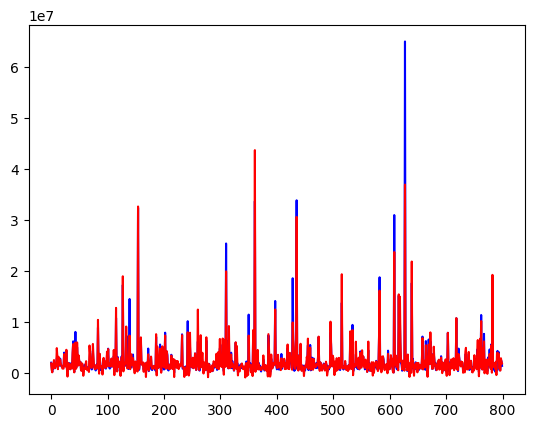

In [ ]:
# Visualizing evaluation Metric Score chart

plt.plot(np.array(y_test), color = 'blue', label = 'actual')
plt.plot(np.array(y_pred_test), color = 'red', label = 'predicted')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Linear Regression Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
linear_cv = LinearRegression()

grid_params = {'fit_intercept' : [True,False], 
               'n_jobs':[1,2,4,8],
               'copy_X' : [True, False],
               'positive': [True, False]}

# Fit the Algorithm
gridcv = GridSearchCV(linear_cv, grid_params,cv = 5)

# Predict on the model
gridcv.fit(X_train,y_train)

print('Optimal hyperparameters => ',gridcv.best_params_)
print('Best score captured => ',gridcv.best_score_)

Optimal hyperparameters =>  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best score captured =>  0.8855563245672016


In [ ]:
grid_linear_reg = gridcv.best_estimator_

In [ ]:
y_pred_test_cv =  grid_linear_reg.predict(X_test)

In [ ]:
print('Linear Regression: Train(CV): '.ljust(30,' '),'=>',grid_linear_reg.score(X_train,y_train))

Linear Regression: Train(CV):  => 0.9077704289921005


In [ ]:
print('Linear Regression: Test(CV): '.ljust(30,' '),'=>',grid_linear_reg.score(X_test,y_test))

Linear Regression: Test(CV):   => 0.8699250323297967


In [ ]:
lr_mse_cv = mean_squared_error(y_test,y_pred_test_cv)
lr_rmse_cv = np.sqrt(lr_mse_cv)
lr_mae_cv = mean_absolute_error(y_test,y_pred_test_cv)
lr_r2_cv = r2_score(y_test,y_pred_test_cv)
print('Linear Regression: MSE (CV)'.ljust(36,' '),'=>',lr_mse_cv)
print('Linear Regression: RMSE (CV)'.ljust(36,' '),'=>',lr_rmse_cv)
print('Linear Regression: MAE (CV)'.ljust(36,' '),'=>',lr_mae_cv)
print('Linear Regression: R2 SCORE (CV)'.ljust(36,' '),'=>',lr_r2_cv)

Linear Regression: MSE (CV)          => 1986549741615.0134
Linear Regression: RMSE (CV)         => 1409450.1557752986
Linear Regression: MAE (CV)          => 529169.1077861005
Linear Regression: R2 SCORE (CV)     => 0.8699250323297967


In [ ]:
mrow = {'model_name': 'LinearRegression',
        'train_score': linear_reg.score(X_train,y_train),
        'test_score': linear_reg.score(X_test,y_test),
        'train_score_cv': grid_linear_reg.score(X_train,y_train),
        'test_score_cv' : grid_linear_reg.score(X_test,y_test),
        'MSE': lr_mse,
        'RMSE': lr_rmse,
        'MAE': lr_mae,
        'R2_SCORE': lr_r2,
        'MSE_CV': lr_mse_cv,
        'MAE_CV': lr_mae_cv,
        'RMSE_CV': lr_rmse_cv,
        'R2_SCORE_CV': lr_r2_cv}
models = models.append(mrow,ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

Here GridSearchCV is opted as we require to tune the paramateres as closely as possible to get a tuple of best parameters there exist. Also it is supported by the requirement that we do not have a large hyperparameter space here, and if that would have been the case in order to improve the speed RandomizedSearchCV could have been used.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, as the default parameters as we can see has provided same accuracy on dataset and the parameterized model. And on the basis of MSE, RMSE and MAE the error is comparatively similar for the default model vs the tuned model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The model does not follow a linear relation somehow, but the scores received are decent.

### ML Model - Ridge Regression

In [ ]:
# ML Model - Ridge Regression Implementation
ridge_reg = Ridge(alpha = 0.1)

# Fit the Algorithm
ridge_reg.fit(X_train, y_train)

# Predict on the model
y_pred_test_ridge = ridge_reg.predict(X_test)

In [ ]:
print('Ridge Regression: Train: '.ljust(30,' '),'=>',ridge_reg.score(X_train,y_train))

Ridge Regression: Train:       => 0.907716344510733


In [ ]:
print('Ridge Regression: Test: '.ljust(30,' '),'=>',ridge_reg.score(X_test,y_test))

Ridge Regression: Test:        => 0.8696728644141192


In [ ]:
# Evaluation metrics of the default parameters provided
rr_mse = mean_squared_error(y_test,y_pred_test_ridge)
rr_rmse = np.sqrt(rr_mse)
rr_mae = mean_absolute_error(y_test,y_pred_test_ridge)
rr_r2 = r2_score(y_test,y_pred_test_ridge)
print('Ridge Regression: MSE '.ljust(36,' '),'=>',rr_mse)
print('Ridge Regression: RMSE '.ljust(36,' '),'=>',rr_rmse)
print('Ridge Regression: MAE  '.ljust(36,' '),'=>',rr_mae)
print('Ridge Regression: R2 SCORE '.ljust(36,' '),'=>',rr_r2)

Ridge Regression: MSE                => 1990400936942.6416
Ridge Regression: RMSE               => 1410815.6991409762
Ridge Regression: MAE                => 523354.9398250869
Ridge Regression: R2 SCORE           => 0.8696728644141192


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

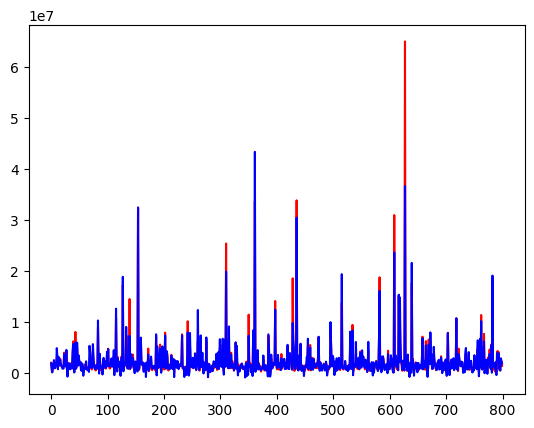

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test), color = 'red', label = 'Actual')
plt.plot(np.array(y_pred_test_ridge), color = 'blue', label = 'Predicted')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Ridge Regression Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_cv = Ridge()

grid_params_reg = { 'alpha' : [0.001,0.01,1.0,10],
              'fit_intercept' : [True,False], 
               'copy_X' : [True, False],
               'positive': [True, False],
               'max_iter':[3000,5000,8000]}

ridge_cv_grid = GridSearchCV(ridge_cv,grid_params_reg,cv = 5)

# Fit the Algorithm
ridge_cv_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [3000, 5000, 8000],
                         'positive': [True, False]})

In [ ]:
# Get the model with best parameters
ridge_cv_mod = ridge_cv_grid.best_estimator_

In [ ]:
# Predict on the model
y_pred_test_ridge_cv = ridge_cv_mod.predict(X_test)

In [ ]:
print('Ridge CV best params =>',ridge_cv_grid.best_params_)

Ridge CV best params => {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 3000, 'positive': False}


In [ ]:
print('Ridge Regression: Train(CV): '.ljust(30,' '),'=>',ridge_cv_mod.score(X_train,y_train))

Ridge Regression: Train(CV):   => 0.9036489763793327


In [ ]:
print('Ridge Regression: Test(CV): '.ljust(30,' '),'=>',ridge_cv_mod.score(X_test,y_test))

Ridge Regression: Test(CV):    => 0.8640585013731682


In [ ]:
# Evaluation metrics of the default parameters provided
rr_mse_cv = mean_squared_error(y_test,y_pred_test_ridge_cv)
rr_rmse_cv = np.sqrt(rr_mse)
rr_mae_cv = mean_absolute_error(y_test,y_pred_test_ridge_cv)
rr_r2_cv = r2_score(y_test,y_pred_test_ridge_cv)
print('Ridge Regression: MSE (CV)'.ljust(36,' '),'=>',rr_mse_cv)
print('Ridge Regression: RMSE (CV)'.ljust(36,' '),'=>',rr_rmse_cv)
print('Ridge Regression: MAE (CV)'.ljust(36,' '),'=>',rr_mae_cv)
print('Ridge Regression: R2 SCORE (CV)'.ljust(36,' '),'=>',rr_r2_cv)

Ridge Regression: MSE (CV)           => 2076145424510.8584
Ridge Regression: RMSE (CV)          => 1410815.6991409762
Ridge Regression: MAE (CV)           => 495887.8418977292
Ridge Regression: R2 SCORE (CV)      => 0.8640585013731682


In [ ]:
mrow = {'model_name': 'RidgeRegression',
        'train_score': ridge_reg.score(X_train,y_train),
        'test_score': ridge_reg.score(X_test,y_test),
        'train_score_cv': ridge_cv_mod.score(X_train,y_train),
        'test_score_cv' : ridge_cv_mod.score(X_test,y_test),
        'MSE': rr_mse,
        'RMSE': rr_rmse,
        'MAE': rr_mae,
        'R2_SCORE': rr_r2,
        'MSE_CV': rr_mse_cv,
        'MAE_CV': rr_mae_cv,
        'RMSE_CV': rr_rmse_cv,
        'R2_SCORE_CV': rr_r2_cv}
models = models.append(mrow,ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

The RandomizedSearchCV method is applied here to get the best alpha paramater and train the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The performance is relatively poor as the r-squared score is very less and the model is only performing well on the train dataset. This indicates that Ridge regression can not be applied to the data here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The r-squared score as we have observed depicts that the model can only cover and explain a small portion of the dataset available. The score on train dataset is adequate, but the model does not perform well on test dataset. The MSE, RMSE and MAE are greater than the previous model Linear Regression, yet still provide an appreciable value.

### ML Model - Lasso Regression

In [ ]:
# ML Model - 3 Implementation
lasso = Lasso(alpha = 0.00001)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
print('Lasso Regression: Train: '.ljust(30,' '),'=>',lasso.score(X_train,y_train))

Lasso Regression: Train:       => 0.9077704289921005


In [ ]:
print('Lasso Regression: Test: '.ljust(30,' '),'=>',lasso.score(X_test,y_test))

Lasso Regression: Test:        => 0.8699250323078986


In [ ]:
# Evaluation metrics of the default parameters provided
ls_mse = mean_squared_error(y_test,y_pred_test_lasso)
ls_rmse = np.sqrt(ls_mse)
ls_mae = mean_absolute_error(y_test,y_pred_test_lasso)
ls_r2 = r2_score(y_test,y_pred_test_lasso)
print('Lasso Regression: MSE '.ljust(36,' '),'=>',ls_mse)
print('Lasso Regression: RMSE '.ljust(36,' '),'=>',ls_rmse)
print('Lasso Regression: MAE '.ljust(36,' '),'=>',ls_mae)
print('Lasso Regression: R2 SCORE '.ljust(36,' '),'=>',ls_r2)

Lasso Regression: MSE                => 1986549741949.4487
Lasso Regression: RMSE               => 1409450.1558939388
Lasso Regression: MAE                => 529169.1077303984
Lasso Regression: R2 SCORE           => 0.8699250323078986


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

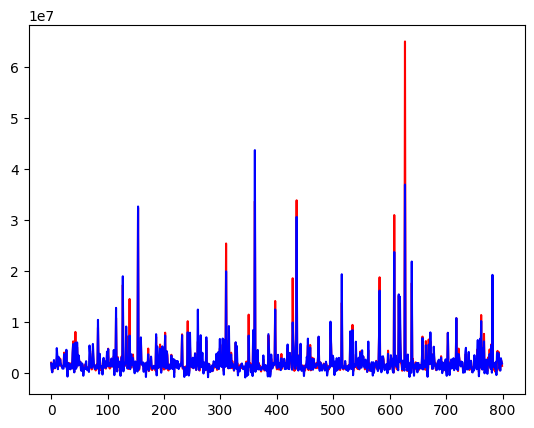

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test), color = 'red', label = 'Actual')
plt.plot(np.array(y_pred_test_lasso), color = 'blue', label = 'Predicted')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Lasso Regression Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_cv = Lasso()
lasso_params = {'alpha' : [1.0,0.1,0.001,0.0001,0.00001,0.000001]}

lasso_grid_cv = GridSearchCV(lasso_cv,lasso_params)

# Fit the Algorithm
lasso_grid_cv.fit(X_train, y_train)


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001, 1e-05, 1e-06]})

In [ ]:
lasso_cv_model = lasso_grid_cv.best_estimator_

In [ ]:
y_pred_test_lasso_cv = lasso_cv_model.predict(X_test)

In [ ]:
print('Lasso CV best params =>',lasso_grid_cv.best_params_)

Lasso CV best params => {'alpha': 1.0}


In [ ]:
print('Ridge Regression: Train(CV): '.ljust(30,' '),'=>',lasso_cv_model.score(X_train,y_train))

Ridge Regression: Train(CV):   => 0.9077704288720964


In [ ]:
print('Ridge Regression: Train(CV): '.ljust(30,' '),'=>',lasso_cv_model.score(X_test,y_test))

Ridge Regression: Train(CV):   => 0.869922842797592


In [ ]:
# Evaluation metrics of the default parameters provided
ls_mse_cv = mean_squared_error(y_test,y_pred_test_lasso_cv)
ls_rmse_cv = np.sqrt(ls_mse)
ls_mae_cv = mean_absolute_error(y_test,y_pred_test_lasso_cv)
ls_r2_cv = r2_score(y_test,y_pred_test_lasso_cv)
print('Lasso Regression: MSE (CV)'.ljust(36,' '),'=>',ls_mse_cv)
print('Lasso Regression: RMSE (CV)'.ljust(36,' '),'=>',ls_rmse_cv)
print('Lasso Regression: MAE (CV)'.ljust(36,' '),'=>',ls_mae_cv)
print('Lasso Regression: R2 SCORE (CV)'.ljust(36,' '),'=>',ls_r2_cv)

Lasso Regression: MSE (CV)           => 1986583180905.55
Lasso Regression: RMSE (CV)          => 1409450.1558939388
Lasso Regression: MAE (CV)           => 529163.5294727178
Lasso Regression: R2 SCORE (CV)      => 0.869922842797592


In [ ]:
mrow = {'model_name': 'LassoRegression',
        'train_score': lasso.score(X_train,y_train),
        'test_score': lasso.score(X_test,y_test),
        'train_score_cv': lasso_cv_model.score(X_train,y_train),
        'test_score_cv' : lasso_cv_model.score(X_test,y_test),
        'MSE': ls_mse,
        'RMSE': ls_rmse,
        'MAE': ls_mae,
        'R2_SCORE': ls_r2,
        'MSE_CV': ls_mse_cv,
        'MAE_CV': ls_mae_cv,
        'RMSE_CV': ls_rmse_cv,
        'R2_SCORE_CV': ls_r2_cv}
models = models.append(mrow,ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV keeping in mind the computational costs and timeframe abundance and short range of parameters required here for Lasso Regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The results gained are almost similar to the point, so it would be safe to assume that the parameters chosen are great already.

### ML Model - RandomForestRegressor

In [ ]:
# ML Model - RandomForestRegressor Implementation
rf_mod = RandomForestRegressor(n_estimators = 10, max_depth = 10)

# Fit the Algorithm
rf_mod.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [ ]:
# Predict on the model
y_pred_test_rf = rf_mod.predict(X_test)

In [ ]:
print('CURRENT PARAMS =>',rf_mod.get_params())

CURRENT PARAMS => {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
print('RandomForestRegressor : Train: '.ljust(30,' '),'=>',rf_mod.score(X_train,y_train))

RandomForestRegressor : Train:  => 0.9885057599638924


In [ ]:
print('RandomForestRegressor : Test: '.ljust(30,' '),'=>',rf_mod.score(X_test,y_test))

RandomForestRegressor : Test:  => 0.9434863570878437


In [ ]:
# Evaluation metrics of the default parameters provided
rf_mse = mean_squared_error(y_test,y_pred_test_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test,y_pred_test_rf)
rf_r2 = r2_score(y_test,y_pred_test_rf)
print('RandomForestRegressor: MSE '.ljust(36,' '),'=>',rf_mse)
print('RandomForestRegressor: RMSE '.ljust(36,' '),'=>',rf_rmse)
print('RandomForestRegressor: MAE '.ljust(36,' '),'=>',rf_mae)
print('RandomForestRegressor: R2 SCORE '.ljust(36,' '),'=>',rf_r2)

RandomForestRegressor: MSE           => 863095834161.6761
RandomForestRegressor: RMSE          => 929029.5119971572
RandomForestRegressor: MAE           => 243742.0358073194
RandomForestRegressor: R2 SCORE      => 0.9434863570878437


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

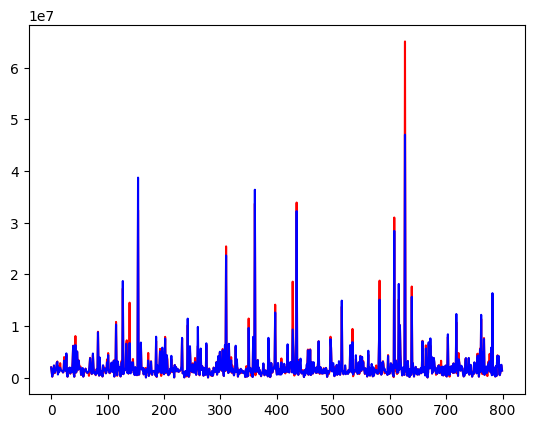

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test), color = 'red', label = 'Actual')
plt.plot(np.array(y_pred_test_rf), color = 'blue', label = 'Predicted')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - RandomForestRegressor Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_mod_cv = RandomForestRegressor(verbose =1)

rf_params = {
  'n_estimators': [200, 500],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [5,6,7,8,9,10,11]
  }
rf_random_cv = GridSearchCV(rf_mod_cv,rf_params, cv = 5, n_jobs = 2)
# Fit the Algorithm
rf_random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [ ]:
# Predict on the model
rf_mod_random_cv = rf_random_cv.best_estimator_

y_pred_test_rf_cv =  rf_mod_random_cv.predict(X_test)

In [ ]:
print('Features Importance =>',rf_mod_random_cv.feature_importances_)

Features Importance => [0.02591643 0.00683973 0.0299665  0.00287547 0.47881831 0.00515894
 0.02756586 0.42285875]


In [ ]:
print('Best Params =>',rf_random_cv.best_params_)

Best Params => {'max_depth': 11, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
print('RandomForestRegressor : Train(CV): '.ljust(30,' '),'=>',rf_mod_random_cv.score(X_train,y_train))

RandomForestRegressor : Train(CV):  => 0.9894384694762883


In [ ]:
print('RandomForestRegressor : Test(CV): '.ljust(30,' '),'=>',rf_mod_random_cv.score(X_test,y_test))

RandomForestRegressor : Test(CV):  => 0.9248076735981383


In [ ]:
rf_mse_cv = mean_squared_error(y_test,y_pred_test_rf_cv)
rf_rmse_cv = np.sqrt(rf_mse_cv)
rf_mae_cv = mean_absolute_error(y_test,y_pred_test_rf_cv)
rf_r2_cv = r2_score(y_test,y_pred_test_rf_cv)
print('RandomForestRegressor: MSE (CV)'.ljust(36,' '),'=>',rf_mse_cv)
print('RandomForestRegressor: RMSE (CV)'.ljust(36,' '),'=>',rf_rmse_cv)
print('RandomForestRegressor: MAE (CV)'.ljust(36,' '),'=>',rf_mae_cv)
print('RandomForestRegressor: R2 SCORE (CV)'.ljust(36,' '),'=>',rf_r2_cv)

RandomForestRegressor: MSE (CV)      => 1148363126745.3123
RandomForestRegressor: RMSE (CV)     => 1071617.0616154412
RandomForestRegressor: MAE (CV)      => 235148.87852325573
RandomForestRegressor: R2 SCORE (CV) => 0.9248076735981383


In [ ]:
mrow = {'model_name': 'RandomForestRegression',
        'train_score': rf_mod.score(X_train,y_train),
        'test_score': rf_mod.score(X_test,y_test),
        'train_score_cv': rf_mod_random_cv.score(X_train,y_train),
        'test_score_cv' : rf_mod_random_cv.score(X_test,y_test),
        'MSE': rf_mse,
        'RMSE': rf_rmse,
        'MAE': rf_mae,
        'R2_SCORE': rf_r2,
        'MSE_CV': rf_mse_cv,
        'MAE_CV': rf_mae_cv,
        'RMSE_CV': rf_rmse_cv,
        'R2_SCORE_CV': rf_r2_cv}
models = models.append(mrow,ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have applied GridSearchCV here to acquire the optimal set of parameters from the ones which we have defined, assuming to form the best combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics show acceptable error results and r-squared score is lesser than expected for the model.

### ML Model - XGBRegressor

In [ ]:
# ML Model - XGBRegressor Implementation
xgbr = XGBRegressor(n_estimators = 10, max_depth = 9)

# Fit the Algorithm
xgbr.fit(X_train,y_train)
# Predict on the model

y_pred_test_xgbr = xgbr.predict(X_test)

In [ ]:
print('XGBRegressor : Train: '.ljust(30,' '),'=>',rf_mod.score(X_train,y_train))

XGBRegressor : Train:          => 0.9885057599638924


In [ ]:
print('XGBRegressor : Test: '.ljust(30,' '),'=>',rf_mod.score(X_test,y_test))

XGBRegressor : Test:           => 0.9434863570878437


In [ ]:
# Evaluation metrics of the default parameters provided
xr_mse = mean_squared_error(y_test,y_pred_test_xgbr)
xr_rmse = np.sqrt(xr_mse)
xr_mae = mean_absolute_error(y_test,y_pred_test_xgbr)
xr_r2 = r2_score(y_test,y_pred_test_xgbr)
print('XGBRegressor: MSE '.ljust(36,' '),'=>',xr_mse)
print('XGBRegressor: RMSE '.ljust(36,' '),'=>',xr_rmse)
print('XGBRegressor: MAE '.ljust(36,' '),'=>',xr_mae)
print('XGBRegressor: R2 SCORE '.ljust(36,' '),'=>',xr_r2)

XGBRegressor: MSE                    => 1038051732422.2239
XGBRegressor: RMSE                   => 1018848.2381700544
XGBRegressor: MAE                    => 230907.41243408204
XGBRegressor: R2 SCORE               => 0.932030624400551


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

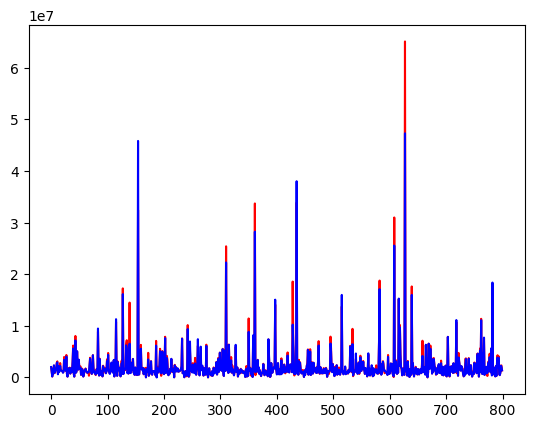

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test), color = 'red', label = 'Actual')
plt.plot(np.array(y_pred_test_xgbr), color = 'blue', label = 'Predicted')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - XGBRegressor Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgbr_mod_cv = XGBRegressor()

xgbr_params = {
    'n_estimators' : np.arange(100,600,100),
    'max_depth' : [9,10,11,12],
}

xgbr_grid_cv = GridSearchCV(xgbr_mod_cv,xgbr_params, cv = 5)
# Fit the Algorithm
xgbr_grid_cv.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'n_estimators': array([100, 200, 300, 400, 500])})

In [ ]:
# Predict on the model
xgbr_grid_cv_mod = xgbr_grid_cv.best_estimator_

y_pred_test_xgbr_cv =  xgbr_grid_cv_mod.predict(X_test)

In [ ]:
print('Feature Importances XGBREgressor => ',xgbr_grid_cv_mod.feature_importances_)

Feature Importances XGBREgressor =>  [7.1308487e-03 1.3621415e-03 3.8522594e-02 1.5300568e-03 4.2133942e-01
 2.9159538e-04 7.9110853e-02 4.5071247e-01]


In [ ]:
print('Best Params : XGBRegressor: '.ljust(30,' '),'=>',xgbr_grid_cv.best_params_)

Best Params : XGBRegressor:    => {'max_depth': 11, 'n_estimators': 200}


In [ ]:
print('XGBRegressor : Train(CV): '.ljust(30,' '),'=>',xgbr_grid_cv_mod.score(X_train,y_train))

XGBRegressor : Train(CV):      => 0.9999999999294615


In [ ]:
print('XGBRegressor : Test(CV): '.ljust(30,' '),'=>',xgbr_grid_cv_mod.score(X_test,y_test))

XGBRegressor : Test(CV):       => 0.938762635871558


In [ ]:
xr_mse_cv = mean_squared_error(y_test,y_pred_test_xgbr_cv)
xr_rmse_cv = np.sqrt(xr_mse_cv)
xr_mae_cv = mean_absolute_error(y_test,y_pred_test_xgbr_cv)
xr_r2_cv = r2_score(y_test,y_pred_test_xgbr_cv)
print('XGBRegressor: MSE (CV)'.ljust(36,' '),'=>',xr_mse_cv)
print('XGBRegressor: RMSE (CV)'.ljust(36,' '),'=>',xr_rmse_cv)
print('XGBRegressor: MAE (CV)'.ljust(36,' '),'=>',xr_mae_cv)
print('XGBRegressor: R2 SCORE (CV)'.ljust(36,' '),'=>',xr_r2_cv)

XGBRegressor: MSE (CV)               => 935238132789.5431
XGBRegressor: RMSE (CV)              => 967077.1079854714
XGBRegressor: MAE (CV)               => 193285.53283935547
XGBRegressor: R2 SCORE (CV)          => 0.938762635871558


In [ ]:
mrow = {'model_name': 'XGBRegressor',
        'train_score': xgbr.score(X_train,y_train),
        'test_score': xgbr.score(X_test,y_test),
        'train_score_cv': xgbr_grid_cv_mod.score(X_train,y_train),
        'test_score_cv' : xgbr_grid_cv_mod.score(X_test,y_test),
        'MSE': xr_mse,
        'RMSE': xr_rmse,
        'MAE': xr_mae,
        'R2_SCORE': xr_r2,
        'MSE_CV': xr_mse_cv,
        'MAE_CV': xr_mae_cv,
        'RMSE_CV': xr_rmse_cv,
        'R2_SCORE_CV': xr_r2_cv}
models = models.append(mrow,ignore_index = True)

##### Which hyperparameter optimization technique have you used and why?

We have applied GridSearchCV here to get specific parameters for best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metrics show acceptable error results and r-squared score is lesser than expected for the model.

### Evalution metrics

In [ ]:
models

,model_name,train_score,test_score,train_score_cv,test_score_cv,MSE,RMSE,MAE,R2_SCORE,MSE_CV,RMSE_CV,MAE_CV,R2_SCORE_CV
0,LinearRegression,0.907770,0.869925,0.907770,0.869925,1.986550e+12,1.409450e+06,529169.107786,0.869925,1.986550e+12,1.409450e+06,529169.107786,0.869925
1,RidgeRegression,0.907716,0.869673,0.903649,0.864059,1.990401e+12,1.410816e+06,523354.939825,0.869673,2.076145e+12,1.410816e+06,495887.841898,0.864059
2,LassoRegression,0.907770,0.869925,0.907770,0.869923,1.986550e+12,1.409450e+06,529169.107730,0.869925,1.986583e+12,1.409450e+06,529163.529473,0.869923
3,RandomForestRegression,0.988506,0.943486,0.989438,0.924808,8.630958e+11,9.290295e+05,243742.035807,0.943486,1.148363e+12,1.071617e+06,235148.878523,0.924808
4,XGBRegressor,0.993426,0.932031,1.000000,0.938763,1.038052e+12,1.018848e+06,230907.412434,0.932031,9.352381e+11,9.670771e+05,193285.532839,0.938763


In [ ]:
models.sort_values(by= ['test_score','R2_SCORE','test_score_cv'], ascending = False)

,model_name,train_score,test_score,train_score_cv,test_score_cv,MSE,RMSE,MAE,R2_SCORE,MSE_CV,RMSE_CV,MAE_CV,R2_SCORE_CV
3,RandomForestRegression,0.988506,0.943486,0.989438,0.924808,8.630958e+11,9.290295e+05,243742.035807,0.943486,1.148363e+12,1.071617e+06,235148.878523,0.924808
4,XGBRegressor,0.993426,0.932031,1.000000,0.938763,1.038052e+12,1.018848e+06,230907.412434,0.932031,9.352381e+11,9.670771e+05,193285.532839,0.938763
0,LinearRegression,0.907770,0.869925,0.907770,0.869925,1.986550e+12,1.409450e+06,529169.107786,0.869925,1.986550e+12,1.409450e+06,529169.107786,0.869925
2,LassoRegression,0.907770,0.869925,0.907770,0.869923,1.986550e+12,1.409450e+06,529169.107730,0.869925,1.986583e+12,1.409450e+06,529163.529473,0.869923
1,RidgeRegression,0.907716,0.869673,0.903649,0.864059,1.990401e+12,1.410816e+06,523354.939825,0.869673,2.076145e+12,1.410816e+06,495887.841898,0.864059


In [ ]:
models.loc[models.model_name == 'RandomForestRegression']['MAE'].values/y.mean()

array([0.11325212])

In [ ]:
models.loc[models.model_name == 'RandomForestRegression']['MAE_CV'].values/y.mean()

array([0.1092594])

In [ ]:
models.loc[models.model_name == 'XGBRegressor']['MAE'].values/y.mean()

array([0.10728865])

In [ ]:
models.loc[models.model_name == 'XGBRegressor']['MAE_CV'].values/y.mean()

array([0.08980805])

In [ ]:
489710.718664/1661354.1194756555

0.294766006189312

In [ ]:
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime of notebook: {:.2f} minutes".format(total_runtime/60))

Total runtime of notebook: 13.91 minutes


# **Conclusion**

- The views for sessions with longer duration is mostly lesser.
- Primary Speaker and comments are the most important features.
- 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***